In [1]:
import re
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')

In [3]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              
                             25%      50%       75%      max  
Mental_State                                                  
Addiction                 249.25    498.5    747.75    997.0  
Alcoholism               1247.50   1497.0   1746.50   1996.0  
Anxiety                  2252.75   2508.5   2764.25   3020.0  
Aspergers                3316.50   3516.0   3715.50   3915.0  
Bipolar                  4171.75   4427.5   4683.25   4939.0  
Borderline Personality   5464.75   5720.5   5976.25   6232.0  
Depression               6762.75   7018.5   7274.25   7530.0  
Schizophernia            7893.75   8149.5   8405.25   8661.0  
SelfHarm                 8958.25   9144.5   9331.75   9518.0  
Suidal Thought           9774.75  10030.5  10286.25  10542.0  
neutral                 10972.75  11228.5  11484.25  11740.0

In [4]:
df.columns

Index(['Unnamed: 0', 'Description', 'Mental_State'], dtype='object')

In [5]:
df.drop(labels='Unnamed: 0', axis=1)

,Description,Mental_State
0,I'm sorry about this post. It's gonna be a who...,Addiction
1,Been getting super high off high amounts of th...,Addiction
2,My brothers been shooting heroin/meth for the ...,Addiction
3,I rlly need an opinion cuz idk bout this stuff...,Addiction
4,Ive smoked weed since 8th grade in middle scho...,Addiction
...,...,...
11736,possible have satpathy ask question the questi...,neutral
11737,god that was thorough,neutral
11738,thread and meat kaun jat bhai,neutral
11739,not touch food with your left hand left handed,neutral


In [6]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Mental_State_label"] = lb_make.fit_transform(df["Mental_State"])
df[["Mental_State", "Mental_State_label"]].head(11)

,Mental_State,Mental_State_label
0,Addiction,0
1,Addiction,0
2,Addiction,0
3,Addiction,0
4,Addiction,0
5,Addiction,0
6,Addiction,0
7,Addiction,0
8,Addiction,0
9,Addiction,0


In [7]:
df.isnull()

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11736,False,False,False,False
11737,False,False,False,False
11738,False,False,False,False
11739,False,False,False,False


In [8]:
df.dropna(inplace=True)

In [9]:
text = df['Description'].values.tolist()

In [10]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              \
                             25%      50%       75%      max   
Mental_State                                                   
Addiction                 249.25    498.5    747.75    997.0   
Alcoholism               1247.50   1497.0   1746.50   1996.0   
Anxiety                  2252.75   2508.5   2764.25   3020.0   
Aspergers                3316.50   3516.0   3715.50   3915.0   
Bipolar                  4171.75   4427.5   4683.25   4939.0   
Borderline Personality   5464.75   5720.5   5976.25   6232.0   
Depression               6762.75   7018.5   7274.25   7530.0   
Schizophernia            7893.75   8149.5   8405.25   8661.0   
SelfHarm                 8958.25   9144.5   9331.75   9518.0   
Suidal Thought           9774.75  10030.5  10286.25  10542.0   
neutral                 10972.75  11228.5  11484.25  11740.0   

                       Mental_State_label                                     \
                                    count  mean  std   min   25%   50%   75%   
Mental_State                                                                   
Addiction                           998.0   0.0  0.0   0.0   0.0   0.0   0.0   
Alcoholism                          999.0   1.0  0.0   1.0   1.0   1.0   1.0   
Anxiety                            1024.0   2.0  0.0   2.0   2.0   2.0   2.0   
Aspergers                           799.0   3.0  0.0   3.0   3.0   3.0   3.0   
Bipolar                            1024.0   4.0  0.0   4.0   4.0   4.0   4.0   
Borderline Personality             1024.0   5.0  0.0   5.0   5.0   5.0   5.0   
Depression                         1024.0   6.0  0.0   6.0   6.0   6.0   6.0   
Schizophernia                      1024.0   7.0  0.0   7.0   7.0   7.0   7.0   
SelfHarm                            746.0   8.0  0.0   8.0   8.0   8.0   8.0   
Suidal Thought                     1024.0   9.0  0.0   9.0   9.0   9.0   9.0   
neutral                            1024.0  10.0  0.0  10.0  10.0  10.0  10.0   

                              
                         max  
Mental_State                  
Addiction                0.0  
Alcoholism               1.0  
Anxiety                  2.0  
Aspergers                3.0  
Bipolar                  4.0  
Borderline Personality   5.0  
Depression               6.0  
Schizophernia            7.0  
SelfHarm                 8.0  
Suidal Thought           9.0  
neutral                 10.0

In [11]:
df["Mental_State"].value_counts()

Anxiety                   1024
Bipolar                   1024
Borderline Personality    1024
Depression                1024
Schizophernia             1024
Suidal Thought            1024
neutral                   1024
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


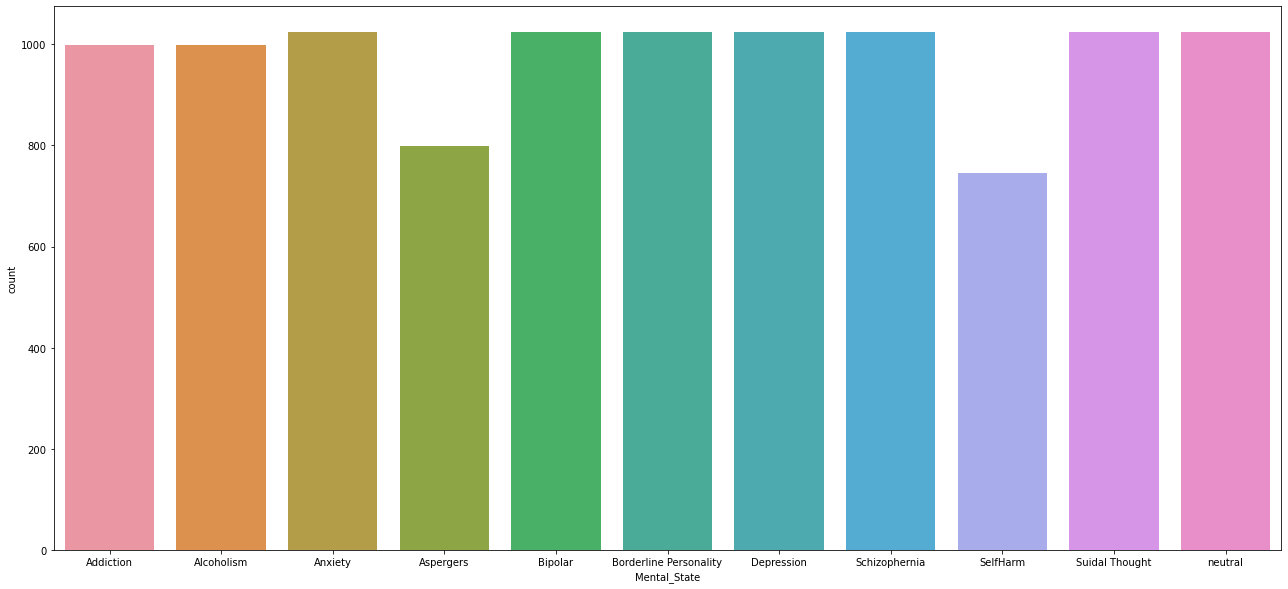

In [12]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [13]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

26163


In [14]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

In [15]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [16]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

In [17]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on description column
df['Description']=df['Description'].apply(simple_stemmer)

In [18]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Description']=df['Description'].apply(remove_stopwords)

{'he', 'by', 'was', 'our', 'have', 'but', 'when', 'here', 'wouldn', 'of', 'up', 'doesn', 'hadn', 'itself', 'him', 'you', 'between', "mustn't", 'very', 'such', 'the', 'while', 'don', 'his', 'these', 'during', 'is', "hasn't", 'its', 'yourselves', 'your', 'didn', 'to', 'should', 'd', "you'll", 'before', 'most', 'until', 'it', 'that', 'wasn', 'under', 'and', 'after', 'will', 'which', 'yourself', 'both', 'out', 'theirs', 'her', 'had', 'nor', 'into', 'having', 'who', 'am', "isn't", 'haven', 'too', 'be', 'ma', 'above', 'this', 'no', 'once', 'she', 'herself', 'through', 're', "shan't", 'about', 't', 'won', 'can', "shouldn't", 'as', "needn't", 'aren', "she's", 'if', 'other', 'because', 'weren', "don't", 'so', 'll', 'where', 'from', "haven't", 'shan', 'm', 'y', "you're", 'do', 'again', 'any', 'being', 'mustn', 'we', 'them', 'further', 'my', "hadn't", 'been', "wasn't", 'myself', 'i', 'ours', 'only', 'isn', 'are', "doesn't", 'hasn', 'then', "that'll", 'some', 'ourselves', 'there', 'o', 'doing', "w

In [19]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

16724


In [20]:
text = df["Description"]

In [21]:
emotion =df["Mental_State"]

In [22]:
print("data shape", df.shape)

data shape (10710, 4)


In [23]:
Mental_Class=df.Mental_State.unique()
dic={}
for i,Mental_State in enumerate(Mental_Class):
    dic[Mental_State]=i
labels=df.Mental_State.apply(lambda x:dic[x])
print(labels)

0         0
1         0
2         0
3         0
4         0
         ..
11736    10
11737    10
11738    10
11739    10
11740    10
Name: Mental_State, Length: 10710, dtype: int64


In [24]:
test_df=df.sample(frac=0.2,random_state=200)
train_df=df.drop(test_df.index)

In [25]:
train_df.head()

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,' sorri thi post. ' gonna whole lot hand wring...,Addiction,0
1,1,get super high high amount thc edibl stuff eve...,Addiction,0
2,2,"brother shoot heroin/meth past 5 years , ran a...",Addiction,0
3,3,rlli need opinion cuz idk bout thi stuff don?t...,Addiction,0
4,4,ive smoke weed sinc 8th grade middl school hoo...,Addiction,0


In [26]:
#checking for ull values
train_df.info()
print()
test_df.info()
print()
#val_df.info()
#print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 11740
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8568 non-null   int64 
 1   Description         8568 non-null   object
 2   Mental_State        8568 non-null   object
 3   Mental_State_label  8568 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 301.2+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 2642 to 3539
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2142 non-null   int64 
 1   Description         2142 non-null   object
 2   Mental_State        2142 non-null   object
 3   Mental_State_label  2142 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 75.3+ KB



In [27]:
train_df["Mental_State"].value_counts()

neutral                   832
Borderline Personality    829
Schizophernia             828
Depression                821
Suidal Thought            821
Anxiety                   804
Bipolar                   804
Addiction                 798
Alcoholism                795
Aspergers                 622
SelfHarm                  614
Name: Mental_State, dtype: int64

In [28]:
test_df["Mental_State"].value_counts()

Anxiety                   220
Bipolar                   220
Alcoholism                204
Suidal Thought            203
Depression                203
Addiction                 200
Schizophernia             196
Borderline Personality    195
neutral                   192
Aspergers                 177
SelfHarm                  132
Name: Mental_State, dtype: int64

In [29]:
#sample text from dataset
sample = train_df["Description"]
print(sample)

0        ' sorri thi post. ' gonna whole lot hand wring...
1        get super high high amount thc edibl stuff eve...
2        brother shoot heroin/meth past 5 years , ran a...
3        rlli need opinion cuz idk bout thi stuff don?t...
4        ive smoke weed sinc 8th grade middl school hoo...
                               ...                        
11734                     parent think punjabi especi sikh
11735    wear thread pull ear take dump easier wear dam...
11736    possibl satpathi ask question question hour fi...
11737                                      god wa thorough
11740                                      say becaus care
Name: Description, Length: 8568, dtype: object


In [30]:
x_train, x_test, y_train, y_test = train_df["Description"], test_df["Description"], train_df["Mental_State_label"], test_df["Mental_State_label"]

In [31]:
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from keras import layers
from keras.models import Sequential

EPOCHS= 35
act= "swish"
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [32]:
#converting text to vectors via tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)
TEST = tokenizer.texts_to_sequences(test_df["Description"]) 

vocab_size = len(tokenizer.word_index) + 1 

In [33]:
#calculating max length of the vector
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)

print('Max len:', maxlen)

Max len: 2621


In [34]:
#Zero padding every vector so that they are the same size
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
TEST = pad_sequences(TEST, padding='post', maxlen=maxlen)

In [35]:
#One Hot Encoding integer labels
dummy_y_test = np_utils.to_categorical(y_test)
dummy_y_train = np_utils.to_categorical(y_train)

In [36]:
#reading fasttext
def get_embedding_vectors(tokenizer, dim=300):
    embedding_index = {}
    with open('glove.840B.300d.txt','r', encoding="cp437", errors='ignore') as f:
        for line in tqdm.tqdm(f, "Reading Glove"):
            values = line.split()
            word = ''.join(values[:-300])
            vectors = np.asarray(values[-300:], dtype='float32')
            embedding_index[word] = vectors

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index)+1, dim))
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            # words not found will be 0s
            embedding_matrix[i] = embedding_vector
          
    return embedding_matrix

In [37]:
embedding_matrix = get_embedding_vectors(tokenizer)

Reading Glove: 2196018it [03:41, 9912.24it/s] 


In [38]:
#defining CNN-BiLSTM model
embedding_dim = 300

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights = [embedding_matrix], input_length=maxlen))
model.add(layers.Dropout(0.3)) 
model.add(layers.Conv1D(filters=64, kernel_size=3, activation=act)) 
model.add(layers.MaxPool1D(pool_size=3)) 
model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation=act)) 
model.add(layers.MaxPool1D(pool_size=3)) 
model.add(layers.Dropout(0.3))
model.add(layers.Bidirectional(layers.LSTM(256, recurrent_dropout=0.3)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation=act)) 
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(11, activation="softmax"))
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2621, 300)         6401700   
                                                                 
 dropout (Dropout)           (None, 2621, 300)         0         
                                                                 
 conv1d (Conv1D)             (None, 2619, 64)          57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 873, 64)          0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 873, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 871, 64)           12352     
                                                        

In [39]:
checkpoint_filepath = './Checkpoint/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='test_accuracy',
    mode='max',
    save_best_only=True)

In [40]:
history = model.fit(X_train, dummy_y_train, epochs=EPOCHS, verbose=1, validation_data=(X_test, dummy_y_test), batch_size=64, callbacks=[model_checkpoint_callback]) 
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/35
134/134 [==============================] - 1804s 13s/step - loss: 1.9458 - accuracy: 0.3000 - val_loss: 1.5077 - val_accuracy: 0.4547
Epoch 2/35
134/134 [==============================] - 2616s 20s/step - loss: 1.3477 - accuracy: 0.5324 - val_loss: 1.2617 - val_accuracy: 0.5710
Epoch 3/35
134/134 [==============================] - 2487s 19s/step - loss: 0.9996 - accuracy: 0.6558 - val_loss: 1.0444 - val_accuracy: 0.6569
Epoch 4/35
134/134 [==============================] - 2576s 19s/step - loss: 0.8027 - accuracy: 0.7249 - val_loss: 0.9543 - val_accuracy: 0.6877
Epoch 5/35
134/134 [==============================] - 2147s 16s/step - loss: 0.6667 - accuracy: 0.7784 - val_loss: 0.9820 - val_accuracy: 0.6979
Epoch 6/35
134/134 [==============================] - 2145s 16s/step - loss: 0.5668 - accuracy: 0.8092 - val_loss: 1.1135 - val_accuracy: 0.6816
Epoch 7/35
134/134 [==============================] - 2141s 16s/step - loss: 0.4707 - accuracy: 0.8410 - val_loss: 1.1399 - val_ac

134/134 [==============================] - 2191s 16s/step - loss: 0.0800 - accuracy: 0.9732 - val_loss: 1.8436 - val_accuracy: 0.6923
Epoch 28/35
134/134 [==============================] - 1799s 13s/step - loss: 0.0693 - accuracy: 0.9772 - val_loss: 1.8638 - val_accuracy: 0.6900
Epoch 29/35
134/134 [==============================] - 1786s 13s/step - loss: 0.0674 - accuracy: 0.9781 - val_loss: 1.9401 - val_accuracy: 0.6951
Epoch 30/35
134/134 [==============================] - 1789s 13s/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 1.9352 - val_accuracy: 0.6905
Epoch 31/35
134/134 [==============================] - 1795s 13s/step - loss: 0.0770 - accuracy: 0.9742 - val_loss: 1.8498 - val_accuracy: 0.7017
Epoch 32/35
134/134 [==============================] - 1798s 13s/step - loss: 0.0571 - accuracy: 0.9830 - val_loss: 1.9923 - val_accuracy: 0.6975
Epoch 33/35
134/134 [==============================] - 1793s 13s/step - loss: 0.0579 - accuracy: 0.9807 - val_loss: 1.9156 - val_accurac

In [41]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

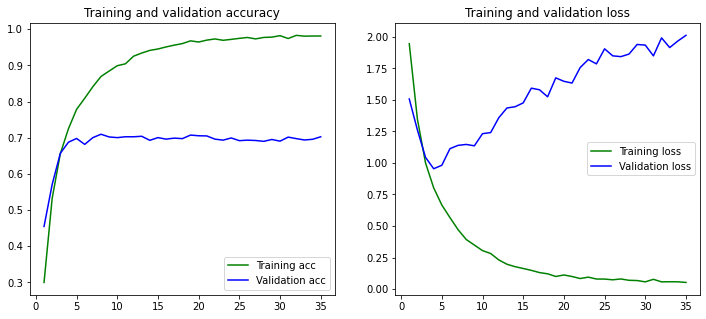

In [42]:
PlotGraph(history)

In [43]:
print(f"Best Accuracy Achieved by Model: {max(history.history['val_accuracy'])}")

Best Accuracy Achieved by Model: 0.7096171975135803


In [44]:
predict = model.predict(TEST)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

array([ 2,  1,  9, ...,  4, 10,  4], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_df["Mental_State_label"], predict_class)
cm

array([[150,  22,   1,   1,   1,   2,   5,   4,   8,   5,   1],
       [ 17, 166,   6,   2,   0,   1,   2,   0,   6,   4,   0],
       [  2,   1, 146,   8,   8,   3,  28,   3,   8,  10,   3],
       [  1,   2,   6, 133,   2,   4,   8,   6,  13,   2,   0],
       [  5,   3,  17,   3, 146,   6,  14,  12,   5,   8,   1],
       [  2,   0,   8,  15,   7, 120,  19,   3,   9,  12,   0],
       [  2,   0,   8,   4,   6,   2, 126,   1,  12,  39,   3],
       [  6,   2,   7,   6,   4,   5,   5, 146,   4,   4,   7],
       [  3,   1,   2,   1,   1,   4,  11,   1,  97,   6,   5],
       [  3,   1,   7,   5,   1,   7,  52,   3,  10, 107,   7],
       [  1,   0,   1,   1,   1,   1,   3,   1,  10,   5, 168]],
      dtype=int64)

<AxesSubplot:>

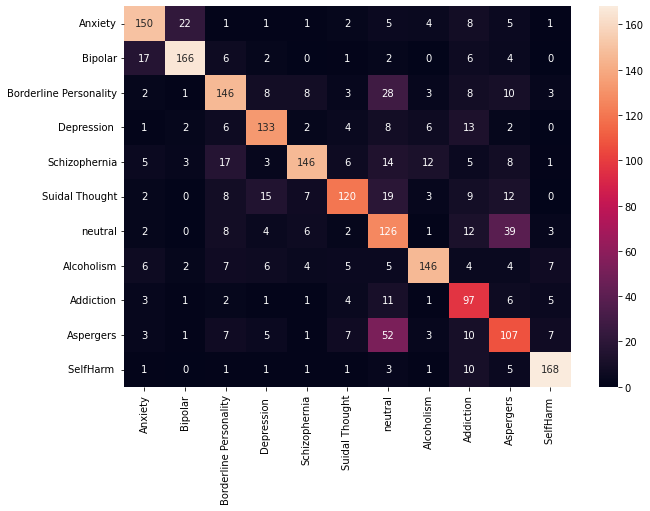

In [48]:
df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
                                "Alcoholism","Addiction","Aspergers","SelfHarm "], 
                     columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
                                "Alcoholism","Addiction","Aspergers","SelfHarm "])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [51]:
from sklearn.metrics import classification_report

print(classification_report(test_df["Mental_State_label"], predict_class, target_names =["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
                                "Alcoholism","Addiction","Aspergers","SelfHarm "]))

                        precision    recall  f1-score   support

               Anxiety       0.78      0.75      0.77       200
               Bipolar       0.84      0.81      0.83       204
Borderline Personality       0.70      0.66      0.68       220
           Depression        0.74      0.75      0.75       177
         Schizophernia       0.82      0.66      0.74       220
        Suidal Thought       0.77      0.62      0.69       195
               neutral       0.46      0.62      0.53       203
            Alcoholism       0.81      0.74      0.78       196
             Addiction       0.53      0.73      0.62       132
             Aspergers       0.53      0.53      0.53       203
             SelfHarm        0.86      0.88      0.87       192

              accuracy                           0.70      2142
             macro avg       0.71      0.71      0.71      2142
          weighted avg       0.72      0.70      0.71      2142



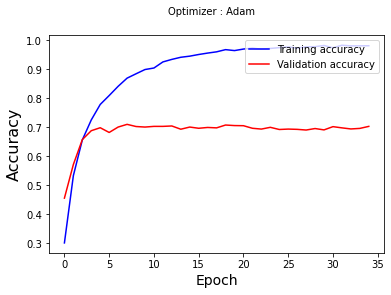

In [56]:
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(history.history['accuracy'], color='b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
plt.legend(loc='upper right')